# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
%matplotlib inline

# Data Cleaning

In [2]:
df = pd.read_csv('Tetra.lrn',sep='\t',skiprows=3,  usecols=[0,1,2,3])

In [3]:
df.head()

,% Key,C1,C2,C3
0,1,1.295428,0.050829,-0.385217
1,2,1.409178,-0.035191,-0.251980
2,3,1.096803,0.246365,-0.415011
3,4,1.463328,0.265354,-0.513488
4,5,1.603284,0.080577,-0.470257


In [4]:
df = df.set_index(['% Key'])

In [5]:
df.head()

,C1,C2,C3
% Key,,,
1,1.295428,0.050829,-0.385217
2,1.409178,-0.035191,-0.251980
3,1.096803,0.246365,-0.415011
4,1.463328,0.265354,-0.513488
5,1.603284,0.080577,-0.470257


# Normalizing the Data

In [6]:
x= df.values
min_max_scaler = preprocessing.MinMaxScaler()
X_normalized = min_max_scaler.fit_transform(x)
df = pd.DataFrame(X_normalized)

# K-Means Implementation

In [7]:
df.columns=['C1','C2','C3']
df.head()
M = df.as_matrix()

In [8]:
def initial_centroids(data, k):
    return data[np.random.randint(data.shape[0], size=k)]

In [9]:
def two_norm(p1,p2):   
    return np.sqrt(np.sum((p2-p1)**2))

In [10]:
def objective_function(old,new):
    return np.sum(np.abs(new-old)**2)

In [11]:
def kmeans(data, k):
    stored_dist = []
    centroids = initial_centroids(data, k)
    Convergence = False
    while (Convergence == False):
        old = centroids
        for i in M:
            for j in centroids:
                stored_dist.append(two_norm(i,j))
        Distances = np.array(stored_dist,dtype=float).reshape(400,k)
        Classification = np.argmin(Distances,axis=1)
        
        for a in range(k):
            centroids[a] = np.mean(data[Classification == a], 0)
        
        new = centroids
        if (objective_function(old,new) < 1**(-1000000000000000000000)):
            Convergence = True
    return centroids

In [12]:
clusters = kmeans(M,4)

In [13]:
k = 4
stored_dist = []
for i in M:
    for j in clusters:
        stored_dist.append(two_norm(i,j))
Distances = np.array(stored_dist,dtype=float).reshape(400,k)
Classification = np.argmin(Distances,axis=1)

In [14]:
clusters

array([[ 0.43584581,  0.46576912,  0.7592367 ],
       [ 0.33809084,  0.77013106,  0.41088861],
       [ 0.75709283,  0.46157549,  0.27072733],
       [ 0.23891158,  0.44829131,  0.21103105]])

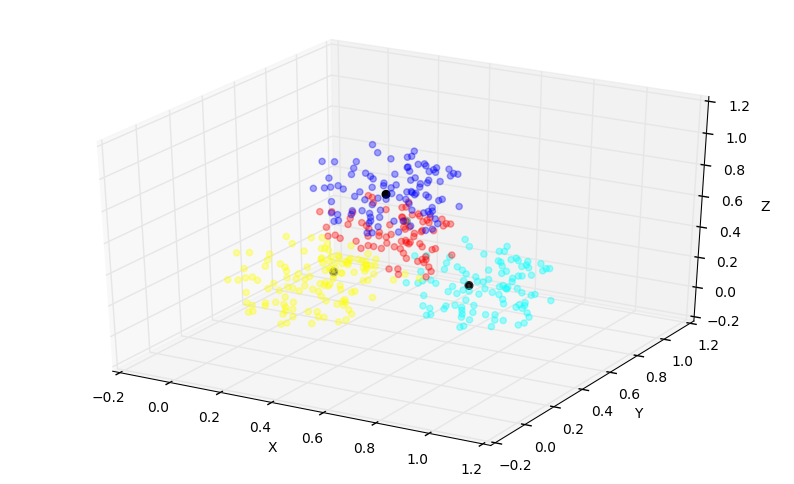

In [15]:
group_colors = ['blue', 'red', 'cyan', 'yellow']
colors = [group_colors[j] for j in Classification]

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(M[:,0], M[:,1],M[:,2], color=colors, alpha=0.35)
ax.scatter(clusters[:,0], clusters[:,1], clusters[:,2], color=['black', 'black', 'black', 'black'], marker='o', lw=2)

fig.set_size_inches(10, 6)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z');